In [ ]:
import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score

from imblearn.metrics import classification_report_imbalanced

dir_path = "COVID-19_Radiography_Dataset/"

folders = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

# Initialisation d'un DataFrame contenant dimensions des images (pixels)
df_img = pd.DataFrame()

# Taille pour diminuer la volumétrie à traiter dans une première approche
new_size = (64,64)

# Parcours des différents répertoires pour récupération infos images
for folder in folders:
    # Lecture des fichiers dans le répertoire
    path = dir_path + folder +"/images"
    files = os.listdir(path)
    nb_files = len(files)
    print("Il y a %i fichiers dans le répertoire %s" %(nb_files, path))

    
    img_list = []
    
    # pour chaque image, lecture et resize((64,64))
    for i in range(1, nb_files + 1):
        file_name = folder + "-"+ str(i) + ".png"
        file_path = path + "/" + file_name
        img=cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, new_size, interpolation = cv2.INTER_LINEAR)
        img_flat = img_resized.flatten()
        img_list.append(img_flat)
        
    flat_data = np.array(img_list)
    
    # constitution d'un DataFrame contenant ces infos
    df_folder = pd.DataFrame(flat_data)
    df_folder['classification'] = folder
    df_img = pd.concat([df_img, df_folder])
    
    df_img.head()



Il y a 3616 fichiers dans le répertoire COVID-19_Radiography_Dataset/COVID/images
Il y a 6012 fichiers dans le répertoire COVID-19_Radiography_Dataset/Lung_Opacity/images
Il y a 10192 fichiers dans le répertoire COVID-19_Radiography_Dataset/Normal/images
Il y a 1345 fichiers dans le répertoire COVID-19_Radiography_Dataset/Viral Pneumonia/images


In [2]:
X = df_img.iloc[:,:-1]
y = df_img['classification']
X.head()



,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1,0,1,0,0,0,0,0,0,0,...,172,171,166,163,144,103,14,0,7,5
1,184,186,187,185,172,74,75,73,81,80,...,159,155,157,151,144,136,122,111,122,111
2,251,178,109,94,38,33,16,8,7,32,...,227,223,220,216,225,225,207,212,208,247
3,13,23,33,175,187,176,134,162,133,168,...,136,133,114,85,53,94,72,67,54,47
4,176,176,176,178,58,59,59,60,60,60,...,171,161,139,135,106,92,89,88,86,89


Modèle SVM avec class_weight='balanced' sur images 64x64

In [4]:
sample_ratios = [0.1, 0.2, 0.3, 0.4]
sample_nb = []
accuracies = []
f1_scores = []

for sample_ratio in sample_ratios:
    # Echantillonnage du jeu de données selon sample_ratio
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=sample_ratio, shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25)
    
    print("Nombre d'échantillons : %i" %X_train.shape[0])
    sample_nb.append(X_train.shape[0])

    # Application modèle SVM
    model = svm.SVC(gamma='scale', class_weight='balanced')
    model.fit(X_train,y_train)

    # Test et affichage des résultats
    y_pred = model.predict(X_test)
    display(pd.crosstab(y_test,y_pred))
    print(classification_report_imbalanced(y_test, y_pred))
    accuracy = model.score(X_test, y_test)
    score = f1_score(y_test, y_pred, average='macro')

    # Stockage dans tableau des scores
    accuracies.append(accuracy)
    f1_scores.append(score)
    


Nombre d'échantillons : 1587


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,52,15,22,0
Lung_Opacity,39,106,17,1
Normal,43,28,172,11
Viral Pneumonia,1,0,2,20


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.39      0.58      0.81      0.46      0.69      0.46        89
   Lung_Opacity       0.71      0.65      0.88      0.68      0.76      0.56       163
         Normal       0.81      0.68      0.85      0.74      0.76      0.57       254
Viral Pneumonia       0.62      0.87      0.98      0.73      0.92      0.84        23

    avg / total       0.70      0.66      0.86      0.67      0.75      0.56       529

Nombre d'échantillons : 3174


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,133,27,22,3
Lung_Opacity,44,218,29,3
Normal,63,51,369,17
Viral Pneumonia,1,1,1,77


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.55      0.72      0.88      0.62      0.79      0.62       185
   Lung_Opacity       0.73      0.74      0.90      0.74      0.82      0.65       294
         Normal       0.88      0.74      0.91      0.80      0.82      0.66       500
Viral Pneumonia       0.77      0.96      0.98      0.86      0.97      0.94        80

    avg / total       0.77      0.75      0.90      0.76      0.82      0.67      1059

Nombre d'échantillons : 4761


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,202,32,36,0
Lung_Opacity,65,332,72,2
Normal,88,39,596,22
Viral Pneumonia,0,2,1,99


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.57      0.75      0.88      0.65      0.81      0.65       270
   Lung_Opacity       0.82      0.70      0.93      0.76      0.81      0.64       471
         Normal       0.85      0.80      0.87      0.82      0.83      0.69       745
Viral Pneumonia       0.80      0.97      0.98      0.88      0.98      0.95       102

    avg / total       0.79      0.77      0.90      0.78      0.83      0.69      1588

Nombre d'échantillons : 6349


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,272,45,31,0
Lung_Opacity,80,421,96,3
Normal,107,83,812,22
Viral Pneumonia,2,3,3,137


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.59      0.78      0.89      0.67      0.84      0.69       348
   Lung_Opacity       0.76      0.70      0.91      0.73      0.80      0.63       600
         Normal       0.86      0.79      0.88      0.83      0.84      0.69      1024
Viral Pneumonia       0.85      0.94      0.99      0.89      0.97      0.93       145

    avg / total       0.79      0.78      0.90      0.78      0.83      0.69      2117



Text(0.5, 1.0, "Métriques pour un SVM class-weight='balanced' sur images réduites 64x64")

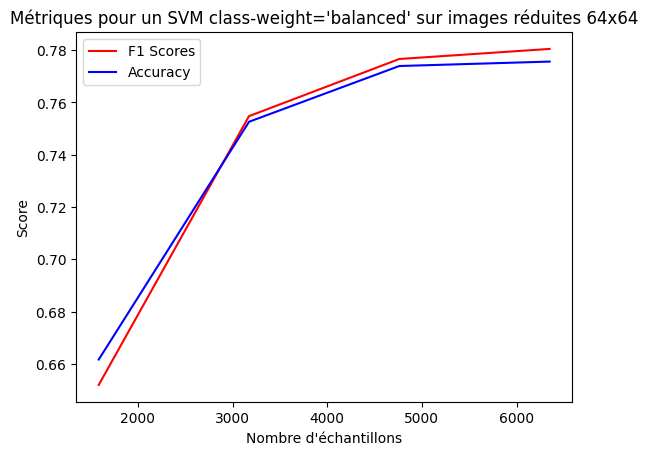

In [ ]:
# Affichage des résultats

plt.plot(sample_nb, f1_scores, c='r', label = 'F1 Score')
plt.plot(sample_nb, accuracies, c='b', label = 'Accuracy')
plt.legend()
plt.xlabel("Nombre d'échantillons")
plt.ylabel('Score')
plt.title("Métriques pour un SVM class-weight='balanced' sur images réduites 64x64")

Modèle SVM class_weight='balanced' pour images 96x96

In [16]:
# Taille pour diminuer la volumétrie à traiter dans une première approche
new_size = (96,96)
df_img = pd.DataFrame()

# Parcours des différents répertoires pour récupération infos images
for folder in folders:
    # Lecture des fichiers dans le répertoire
    path = dir_path + folder +"/images"
    files = os.listdir(path)
    nb_files = len(files)
    print("Il y a %i fichiers dans le répertoire %s" %(nb_files, path))

    
    img_list = []
    
    # pour chaque image, lecture et resize(new_size)
    for i in range(1, nb_files + 1):
        file_name = folder + "-"+ str(i) + ".png"
        file_path = path + "/" + file_name
        img=cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, new_size, interpolation = cv2.INTER_LINEAR)
        img_flat = img_resized.flatten()
        img_list.append(img_flat)
        
    flat_data = np.array(img_list)
    
    # constitution d'un DataFrame contenant ces infos
    df_folder = pd.DataFrame(flat_data)
    df_folder['classification'] = folder
    df_img = pd.concat([df_img, df_folder])
    
    df_img.head()


Il y a 3616 fichiers dans le répertoire COVID-19_Radiography_Dataset/COVID/images
Il y a 6012 fichiers dans le répertoire COVID-19_Radiography_Dataset/Lung_Opacity/images
Il y a 10192 fichiers dans le répertoire COVID-19_Radiography_Dataset/Normal/images
Il y a 1345 fichiers dans le répertoire COVID-19_Radiography_Dataset/Viral Pneumonia/images


,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,12,0,0,0,0,0,0,0,0,0,...,162,148,128,95,31,0,1,13,1,21
1,182,184,184,184,184,182,188,67,71,78,...,149,145,146,137,130,119,118,123,115,110
2,231,254,247,217,165,162,107,94,87,56,...,223,232,233,235,222,221,231,245,249,239
3,12,24,20,13,180,160,172,129,186,162,...,80,54,52,106,102,44,37,61,59,59
4,180,179,179,179,179,181,86,86,86,86,...,131,112,98,90,89,88,89,87,87,84


Nombre d'échantillons : 1587


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,66,12,14,1
Lung_Opacity,31,99,13,1
Normal,32,18,203,6
Viral Pneumonia,0,1,0,32


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.51      0.71      0.86      0.59      0.78      0.60        93
   Lung_Opacity       0.76      0.69      0.92      0.72      0.80      0.62       144
         Normal       0.88      0.78      0.90      0.83      0.84      0.70       259
Viral Pneumonia       0.80      0.97      0.98      0.88      0.98      0.95        33

    avg / total       0.78      0.76      0.90      0.76      0.83      0.67       529

Nombre d'échantillons : 3174


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,115,29,14,1
Lung_Opacity,36,208,49,2
Normal,70,36,415,16
Viral Pneumonia,1,1,1,65


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.52      0.72      0.88      0.60      0.80      0.63       159
   Lung_Opacity       0.76      0.71      0.91      0.73      0.80      0.63       295
         Normal       0.87      0.77      0.88      0.82      0.82      0.67       537
Viral Pneumonia       0.77      0.96      0.98      0.86      0.97      0.94        68

    avg / total       0.78      0.76      0.89      0.76      0.82      0.67      1059

Nombre d'échantillons : 4761


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,196,30,21,5
Lung_Opacity,80,302,69,3
Normal,80,63,614,30
Viral Pneumonia,2,1,1,91


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.55      0.78      0.88      0.64      0.83      0.68       252
   Lung_Opacity       0.76      0.67      0.92      0.71      0.78      0.59       454
         Normal       0.87      0.78      0.89      0.82      0.83      0.68       787
Viral Pneumonia       0.71      0.96      0.97      0.81      0.97      0.93        95

    avg / total       0.78      0.76      0.90      0.76      0.82      0.67      1588

Nombre d'échantillons : 6349


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,296,42,32,3
Lung_Opacity,73,451,77,2
Normal,94,62,820,38
Viral Pneumonia,2,7,3,115


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.64      0.79      0.90      0.71      0.85      0.71       373
   Lung_Opacity       0.80      0.75      0.93      0.77      0.83      0.68       603
         Normal       0.88      0.81      0.90      0.84      0.85      0.72      1014
Viral Pneumonia       0.73      0.91      0.98      0.81      0.94      0.88       127

    avg / total       0.81      0.79      0.91      0.80      0.85      0.72      2117



Text(0.5, 1.0, "Métriques pour un SVM class-weight='balanced' sur images réduites 96x96")

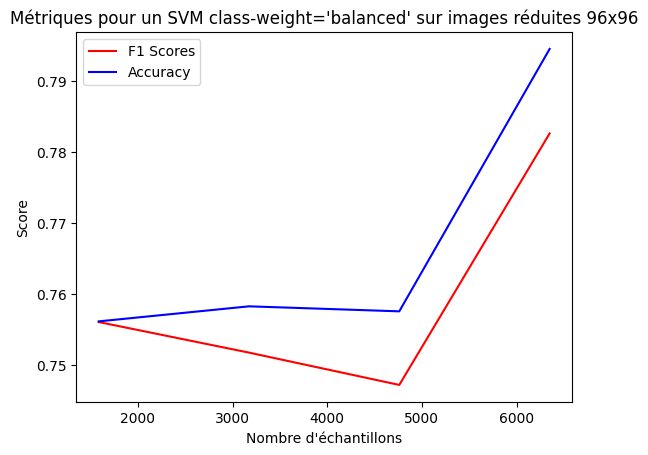

In [ ]:
X = df_img.iloc[:,:-1]
y = df_img['classification']
display(X.head())


sample_ratios = [0.1, 0.2, 0.3, 0.4]
sample_nb = []
accuracies = []
f1_scores = []

for sample_ratio in sample_ratios:
    # Echantillonnage du jeu de données selon sample_ratio
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=sample_ratio, shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25)
    
    print("Nombre d'échantillons : %i" %X_train.shape[0])
    sample_nb.append(X_train.shape[0])

    # Application modèle SVM
    model = svm.SVC(gamma='scale', class_weight='balanced')
    model.fit(X_train,y_train)

    # Test et affichage des résultats
    y_pred = model.predict(X_test)
    display(pd.crosstab(y_test,y_pred))
    print(classification_report_imbalanced(y_test, y_pred))
    accuracy = model.score(X_test, y_test)
    score = f1_score(y_test, y_pred, average='macro')

    # Stockage dans tableau des scores
    accuracies.append(accuracy)
    f1_scores.append(score)

# Affichage des résultats

plt.plot(sample_nb, f1_scores, c='r', label = 'F1 Score')
plt.plot(sample_nb, accuracies, c='b', label = 'Accuracy')
plt.legend()
plt.ylim(0.64,0.80)
plt.xlabel("Nombre d'échantillons")
plt.ylabel('Score')
plt.title("Métriques pour un SVM class-weight='balanced' sur images réduites 96x96")

Text(0.5, 1.0, "Métriques pour un SVM class-weight='balanced' sur images réduites 96x96")

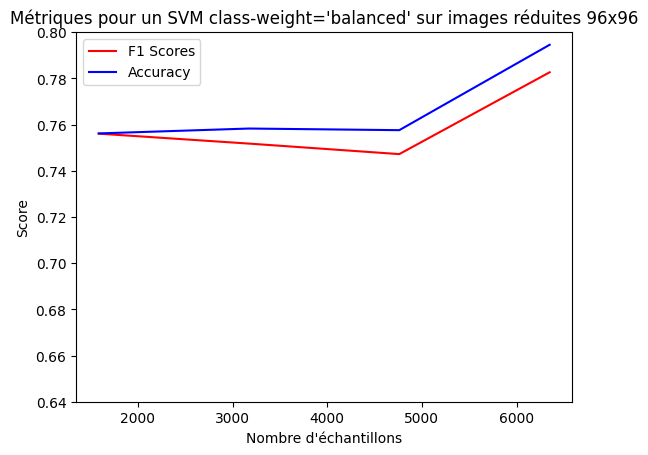

In [ ]:
plt.plot(sample_nb, f1_scores, c='r', label = 'F1 Score')
plt.plot(sample_nb, accuracies, c='b', label = 'Accuracy')
plt.legend()
plt.ylim(0.64,0.80)
plt.xlabel("Nombre d'échantillons")
plt.ylabel('Score')
plt.title("Métriques pour un SVM class-weight='balanced' sur images réduites 96x96")

Modèle SVM pour images 128x128
~1h de traitement

In [19]:
# Taille pour diminuer la volumétrie à traiter dans une première approche
new_size = (128,128)
df_img = pd.DataFrame()

# Parcours des différents répertoires pour récupération infos images
for folder in folders:
    # Lecture des fichiers dans le répertoire
    path = dir_path + folder +"/images"
    files = os.listdir(path)
    nb_files = len(files)
    print("Il y a %i fichiers dans le répertoire %s" %(nb_files, path))

    
    img_list = []
    
    # pour chaque image, lecture et resize(new_size)
    for i in range(1, nb_files + 1):
        file_name = folder + "-"+ str(i) + ".png"
        file_path = path + "/" + file_name
        img=cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, new_size, interpolation = cv2.INTER_LINEAR)
        img_flat = img_resized.flatten()
        img_list.append(img_flat)
        
    flat_data = np.array(img_list)
    
    # constitution d'un DataFrame contenant ces infos
    df_folder = pd.DataFrame(flat_data)
    df_folder['classification'] = folder
    df_img = pd.concat([df_img, df_folder])
    
    df_img.head()


Il y a 3616 fichiers dans le répertoire COVID-19_Radiography_Dataset/COVID/images
Il y a 6012 fichiers dans le répertoire COVID-19_Radiography_Dataset/Lung_Opacity/images
Il y a 10192 fichiers dans le répertoire COVID-19_Radiography_Dataset/Normal/images
Il y a 1345 fichiers dans le répertoire COVID-19_Radiography_Dataset/Viral Pneumonia/images


In [20]:
X = df_img.iloc[:,:-1]
y = df_img['classification']
display(X.head())


sample_ratios = [0.1, 0.2, 0.3, 0.4]
sample_nb = []
accuracies = []
f1_scores = []

for sample_ratio in sample_ratios:
    # Echantillonnage du jeu de données selon sample_ratio
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=sample_ratio, shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25)
    
    print("Nombre d'échantillons : %i" %X_train.shape[0])
    sample_nb.append(X_train.shape[0])

    # Application modèle SVM
    model = svm.SVC(gamma='scale', class_weight='balanced')
    model.fit(X_train,y_train)

    # Test et affichage des résultats
    y_pred = model.predict(X_test)
    display(pd.crosstab(y_test,y_pred))
    print(classification_report_imbalanced(y_test, y_pred))
    accuracy = model.score(X_test, y_test)
    score = f1_score(y_test, y_pred, average='macro')

    # Stockage dans tableau des scores
    accuracies.append(accuracy)
    f1_scores.append(score)

# Affichage des résultats

plt.plot(sample_nb, f1_scores, c='r', label = 'F1 Score')
plt.plot(sample_nb, accuracies, c='b', label = 'Accuracy')
plt.legend()
plt.ylim(0.64,0.80)
plt.xlabel("Nombre d'échantillons")
plt.ylabel('Score')
plt.title("Métriques pour un SVM class-weight='balanced' sur images réduites 128x128")

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,52,0,0,0,0,0,0,0,0,0,...,115,88,38,1,1,1,17,0,0,57
1,186,185,183,184,184,186,183,183,186,106,...,147,138,133,122,120,119,122,120,111,110
2,186,255,255,252,237,217,212,187,160,155,...,240,241,232,229,234,240,247,251,255,212
3,13,19,25,17,6,133,174,157,176,151,...,88,104,115,35,88,26,65,100,65,68
4,195,195,195,195,195,195,195,196,133,130,...,95,90,89,88,87,90,89,86,89,83


Nombre d'échantillons : 1587


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,55,20,14,0
Lung_Opacity,22,109,21,3
Normal,34,31,174,8
Viral Pneumonia,0,0,0,38


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.50      0.62      0.87      0.55      0.73      0.53        89
   Lung_Opacity       0.68      0.70      0.86      0.69      0.78      0.60       155
         Normal       0.83      0.70      0.88      0.76      0.79      0.61       247
Viral Pneumonia       0.78      1.00      0.98      0.87      0.99      0.98        38

    avg / total       0.73      0.71      0.88      0.71      0.79      0.62       529

Nombre d'échantillons : 3174


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,154,32,20,1
Lung_Opacity,44,224,28,0
Normal,67,41,364,13
Viral Pneumonia,1,2,1,67


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.58      0.74      0.87      0.65      0.80      0.64       207
   Lung_Opacity       0.75      0.76      0.90      0.75      0.83      0.67       296
         Normal       0.88      0.75      0.91      0.81      0.83      0.68       485
Viral Pneumonia       0.83      0.94      0.99      0.88      0.96      0.93        71

    avg / total       0.78      0.76      0.91      0.77      0.83      0.68      1059

Nombre d'échantillons : 4761


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,236,29,32,1
Lung_Opacity,70,329,57,1
Normal,66,78,574,18
Viral Pneumonia,1,3,1,92


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.63      0.79      0.89      0.70      0.84      0.70       298
   Lung_Opacity       0.75      0.72      0.90      0.73      0.81      0.64       457
         Normal       0.86      0.78      0.89      0.82      0.84      0.69       736
Viral Pneumonia       0.82      0.95      0.99      0.88      0.97      0.93        97

    avg / total       0.79      0.78      0.90      0.78      0.84      0.69      1588

Nombre d'échantillons : 6349


col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,260,32,36,2
Lung_Opacity,75,430,79,2
Normal,98,93,833,35
Viral Pneumonia,4,0,1,137


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.59      0.79      0.90      0.68      0.84      0.70       330
   Lung_Opacity       0.77      0.73      0.92      0.75      0.82      0.66       586
         Normal       0.88      0.79      0.89      0.83      0.84      0.69      1059
Viral Pneumonia       0.78      0.96      0.98      0.86      0.97      0.94       142

    avg / total       0.80      0.78      0.91      0.79      0.84      0.70      2117



KeyboardInterrupt: 

Test d'un Réseau de Neurones avec Scikit Learn : MLPClassifier

Nombre d'échantillons : 1587


C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(folders, [0,1,2,3])
C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(folders, [0,1,2,3])


col_0,0,1,2,3
classification,,,,
0,7,30,43,1
1,2,91,54,0
2,0,37,231,0
3,1,5,19,8


                   pre       rec       spe        f1       geo       iba       sup

          0       0.70      0.09      0.99      0.15      0.29      0.08        81
          1       0.56      0.62      0.81      0.59      0.71      0.49       147
          2       0.67      0.86      0.56      0.75      0.69      0.49       268
          3       0.89      0.24      1.00      0.38      0.49      0.22        33

avg / total       0.66      0.64      0.72      0.59      0.62      0.41       529

Nombre d'échantillons : 3174


C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(folders, [0,1,2,3])
C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(folders, [0,1,2,3])


col_0,2
classification,
0,176
1,316
2,508
3,59


c:\Users\H95651\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(folders, [0,1,2,3])
C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To op

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00       176
          1       0.00      0.00      1.00      0.00      0.00      0.00       316
          2       0.48      1.00      0.00      0.65      0.00      0.00       508
          3       0.00      0.00      1.00      0.00      0.00      0.00        59

avg / total       0.23      0.48      0.52      0.31      0.00      0.00      1059

Nombre d'échantillons : 4761


col_0,0,1,2,3
classification,,,,
0,12,94,155,3
1,5,295,148,6
2,2,65,663,32
3,0,21,10,77


                   pre       rec       spe        f1       geo       iba       sup

          0       0.63      0.05      0.99      0.08      0.21      0.04       264
          1       0.62      0.65      0.84      0.64      0.74      0.54       454
          2       0.68      0.87      0.62      0.76      0.74      0.55       762
          3       0.65      0.71      0.97      0.68      0.83      0.68       108

avg / total       0.65      0.66      0.77      0.61      0.66      0.47      1588

Nombre d'échantillons : 6349


C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(folders, [0,1,2,3])
C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\165179129.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(folders, [0,1,2,3])


col_0,1,2
classification,,
0,0,359
1,0,599
2,1,1029
3,0,129


                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00       359
          1       0.00      0.00      1.00      0.00      0.00      0.00       599
          2       0.49      1.00      0.00      0.65      0.00      0.00      1030
          3       0.00      0.00      1.00      0.00      0.00      0.00       129

avg / total       0.24      0.49      0.51      0.32      0.00      0.00      2117



c:\Users\H95651\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

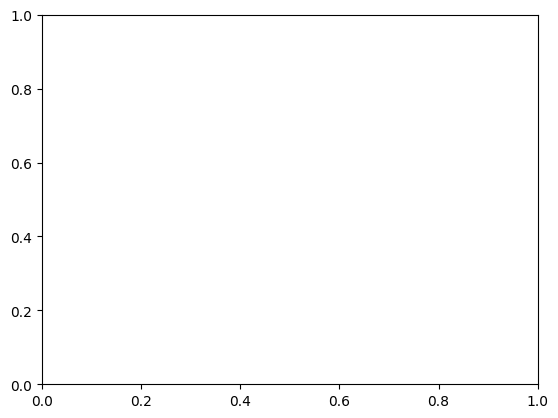

In [ ]:
from sklearn.neural_network import MLPClassifier

sample_ratios = [0.1, 0.2, 0.3, 0.4]
sample_nb = []
accuracies = []
f1_scores = []

for sample_ratio in sample_ratios:
    # Echantillonnage du jeu de données selon sample_ratio
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=sample_ratio, shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25)
    
    print("Nombre d'échantillons : %i" %X_train.shape[0])
    sample_nb.append(X_train.shape[0])

    y_train = y_train.replace(folders, [0,1,2,3])
    y_test = y_test.replace(folders, [0,1,2,3])

    # Créer et entraîner un modèle MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, alpha=0.001, solver='adam', early_stopping=True)
    model.fit(X_train, y_train)

    # Test et affichage des résultats
    y_pred = model.predict(X_test)
    display(pd.crosstab(y_test,y_pred))
    print(classification_report_imbalanced(y_test, y_pred))


# Affichage des résultats

plt.plot(sample_nb, f1_scores, c='r', label = 'F1 Score')
plt.plot(sample_nb, accuracies, c='b', label = 'Accuracy')
plt.legend()
plt.ylim(0.64,0.80)
plt.xlabel("Nombre d'échantillons")
plt.ylabel('Score')
plt.title("Métriques pour un SVM class-weight='balanced' sur images réduites 128x128")



In [5]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.3, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25)

print("Nombre d'échantillons : %i" %X_train.shape[0])

y_train = y_train.replace(folders, [0,1,2,3])
y_test = y_test.replace(folders, [0,1,2,3])

# Créer et entraîner un modèle MLPClassifier
model = MLPClassifier(max_iter=1000, random_state=42, alpha=0.001)


clf = GridSearchCV(model, parameter_grid, cv=3)
clf.fit(X_train, y_train)


# Test et affichage des résultats
y_pred = clf.predict(X_test)
display(pd.crosstab(y_test,y_pred))
print(classification_report_imbalanced(y_test, y_pred))
print(clf.best_params_)

Nombre d'échantillons : 4761


C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\2389423864.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(folders, [0,1,2,3])
C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\2389423864.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(folders, [0,1,2,3])


col_0,0,1,2,3
classification,,,,
0,143,36,93,13
1,60,219,152,14
2,40,38,653,13
3,3,2,5,104


                   pre       rec       spe        f1       geo       iba       sup

          0       0.58      0.50      0.92      0.54      0.68      0.44       285
          1       0.74      0.49      0.93      0.59      0.68      0.44       445
          2       0.72      0.88      0.70      0.79      0.79      0.63       744
          3       0.72      0.91      0.97      0.81      0.94      0.88       114

avg / total       0.70      0.70      0.83      0.69      0.75      0.56      1588

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


Test Réseau de Neurones avec équilibrage des classes

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(sampling_strategy='not minority')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
X_train, y_train = sampler.fit_resample(X_train, y_train)

print("Nombre d'échantillons : %i" %X_train.shape[0])
print(y_train.value_counts())

y_train = y_train.replace(folders, [0,1,2,3])
y_test = y_test.replace(folders, [0,1,2,3])

# Créer et entraîner un modèle MLPClassifier
model = MLPClassifier(max_iter=1000, random_state=42, activation='relu', alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate='constant', solver='adam')

model.fit(X_train, y_train)


# Test et affichage des résultats
y_pred = clf.predict(X_test)
display(pd.crosstab(y_test,y_pred))
print(classification_report_imbalanced(y_test, y_pred))

Nombre d'échantillons : 3972
classification
COVID              993
Lung_Opacity       993
Normal             993
Viral Pneumonia    993
Name: count, dtype: int64


C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\452955130.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(folders, [0,1,2,3])
C:\Users\H95651\AppData\Local\Temp\ipykernel_80308\452955130.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(folders, [0,1,2,3])


col_0,0,1,2,3
classification,,,,
0,529,95,289,23
1,257,775,452,52
2,175,82,2178,33
3,7,6,22,317


                   pre       rec       spe        f1       geo       iba       sup

          0       0.55      0.57      0.90      0.56      0.71      0.49       936
          1       0.81      0.50      0.95      0.62      0.69      0.46      1536
          2       0.74      0.88      0.73      0.81      0.80      0.65      2468
          3       0.75      0.90      0.98      0.82      0.94      0.87       352

avg / total       0.73      0.72      0.84      0.71      0.76      0.58      5292



SVM après équilibrage des classes par UnderSampling (images 96x96)

In [ ]:
# Constitution du JDD

def get_data(size):

    """
    Input : taille des images à considérer. ex: (64x64)
    Output : X , y
    X : features = 1 dimension par pixel
    y : target = classification
    """


    dir_path = "COVID-19_Radiography_Dataset/"
    folders = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

    # Initialisation d'un DataFrame contenant dimensions des images (pixels)
    df_img = pd.DataFrame()

    # Taille pour diminuer la volumétrie à traiter 
    new_size = size

    # Parcours des différents répertoires pour récupération infos images
    for folder in folders:
        # Lecture des fichiers dans le répertoire
        path = dir_path + folder +"/images"
        files = os.listdir(path)
        nb_files = len(files)
        print("Il y a %i fichiers dans le répertoire %s" %(nb_files, path))

        
        img_list = []
        
        # pour chaque image, lecture et resize((64,64))
        for i in range(1, nb_files + 1):
            file_name = folder + "-"+ str(i) + ".png"
            file_path = path + "/" + file_name
            img=cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img, new_size, interpolation = cv2.INTER_LINEAR)
            img_flat = img_resized.flatten()
            img_list.append(img_flat)
            
        flat_data = np.array(img_list)
        
        # constitution d'un DataFrame contenant ces infos
        df_folder = pd.DataFrame(flat_data)
        df_folder['classification'] = folder
        df_img = pd.concat([df_img, df_folder])
        
        df_img.head()

    X = df_img.iloc[:,:-1]
    y = df_img['classification']

    return(X,y)


X, y = get_data((96,96))

Il y a 3616 fichiers dans le répertoire COVID-19_Radiography_Dataset/COVID/images
Il y a 6012 fichiers dans le répertoire COVID-19_Radiography_Dataset/Lung_Opacity/images
Il y a 10192 fichiers dans le répertoire COVID-19_Radiography_Dataset/Normal/images
Il y a 1345 fichiers dans le répertoire COVID-19_Radiography_Dataset/Viral Pneumonia/images


In [12]:
sampler = RandomUnderSampler(sampling_strategy='not minority')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, y_train = sampler.fit_resample(X_train, y_train)

print("Nombre d'échantillons : %i" %X_train.shape[0])
print(y_train.value_counts())

Nombre d'échantillons : 4328
classification
COVID              1082
Lung_Opacity       1082
Normal             1082
Viral Pneumonia    1082
Name: count, dtype: int64


In [13]:
model = svm.SVC(gamma='scale')
model.fit(X_train,y_train)

# Test et affichage des résultats
y_pred = model.predict(X_test)
display(pd.crosstab(y_test,y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0,COVID,Lung_Opacity,Normal,Viral Pneumonia
classification,,,,
COVID,548,113,66,11
Lung_Opacity,156,840,156,14
Normal,235,172,1552,107
Viral Pneumonia,3,1,2,257


                       pre       rec       spe        f1       geo       iba       sup

          COVID       0.58      0.74      0.89      0.65      0.81      0.65       738
   Lung_Opacity       0.75      0.72      0.91      0.73      0.81      0.64      1166
         Normal       0.87      0.75      0.90      0.81      0.82      0.66      2066
Viral Pneumonia       0.66      0.98      0.97      0.79      0.97      0.95       263

    avg / total       0.77      0.76      0.90      0.76      0.83      0.67      4233

